In [18]:
library(tidyverse)
library(nycflights13)

# Lab 9 -- Functions, Functions, Functions

## Anatomy of a function
To write a function we should first think about the inputs and output. A function takes input(s), does something(s) to them, and then returns an output.

What are the input(s) and output of our normalize function?
```{r}
df$a <- (df$a - min(df$a, na.rm = TRUE)) / 
  (max(df$a, na.rm = TRUE) - min(df$a, na.rm = TRUE))
```

In [20]:
rescale01 <- function(x) {
#  ^ function name   ^ function argument (input vector)
    (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))
#   ^ function output
}

In [25]:
x = c(1:10, Inf)
rescale01(x)

 [1]   0   0   0   0   0   0   0   0   0   0 NaN

We have turned up a bug in our function! But since the code now all lives in one place, we can fix the function once rather than having to chase down the bug every place that we copied and pasted the code.

In [9]:
rescale01 = function(x) {
  rng = range(x, na.rm = TRUE, finite = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}
rescale01(x)

 [1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000       Inf

### Conditions
The `condition` part of the `if` statement must evaluate to either a single `TRUE` or `FALSE`. If it does not, you will get a warning:

In [1]:
if (c(T, F)) { 1 }

Warning message in if (c(T, F)) {:
“the condition has length > 1 and only the first element will be used”

[1] 1

(Why?) Similarly, a condition of `NA` will generate an error:

In [2]:
if (NA) { 1 }

ERROR: Error in if (NA) {: missing value where TRUE/FALSE needed


#### Logical operators
Often you will need to combine multiple logical conditions in an `if` statement. To do this we have the `&&` and `||` operators, which take the logical `and` and `or`, respectively, of several logical conditions:

In [3]:
TRUE && FALSE && TRUE

[1] FALSE

In [4]:
FALSE || TRUE || FALSE

[1] TRUE

There is a subtle but important difference betwen the single and double versions of these operators. The single `&` performs entrywise `AND` over logical vectors:

In [5]:
c(T, T, F) & c(F, T, F)

[1] FALSE  TRUE FALSE

In contrast, the double ampersand `&&` returns `F` as soon as it encounters a value of `F`:

In [6]:
c(T, T, T) && c(F, T, F)

[1] FALSE

It only returns `T` if it gets to the end of a vector without finding any `F` values:

In [7]:
c(T, T, T) && c(T, T, T)

[1] TRUE

This is known as "short-circuiting": R can stop evaluating as soon as it hits *one* false value, since this will cause the `&` to return false:

In [12]:
f = function() { print("f called"); F }
g = function() { print("g called"); T }
f() && g()

g() && f()

[1] "f called"


[1] FALSE

[1] "g called"
[1] "f called"


[1] FALSE

The or operator works similarly:

In [11]:
g() || f()

f() || g()

[1] "g called"


[1] TRUE

[1] "f called"
[1] "g called"


[1] TRUE

#### Testing for equality
Be careful when testing for equality in conditionals. The `==` operator will return a *vector* of logicals. If you want to make sure that any/all entries of a vector are `TRUE`, use the `any()` or `all()` functions:

In [13]:
v1 = c(1, 2, 3)
v2 = c(1, 1, 2)
if (v1 == v2) { print("Wrong!") }
if (all(v1 == v2)) { print("All!") }
if (any(v1 == v2)) { print("Any!") }

Warning message in if (v1 == v2) {:
“the condition has length > 1 and only the first element will be used”

[1] "Wrong!"
[1] "Any!"


Also be wary of testing floating point numbers for equality:

In [ ]:
2 == sqrt(2) ^ 2

If you need to do this, use the `near()` function instead:

In [ ]:
near(2, sqrt(2) ^ 2)

### Multiple conditions
Sometimes you will want to check multiple conditions using an `if` statement. For example, let's define the function $$\operatorname{sgn}(x) = \begin{cases}-1,&x<0\\0,&x=0\\1,&x>0.\end{cases}$$

In [ ]:
sgn = function(x) {
    # code
}

The general form is
```{r}
if (this) {
  # do that
} else if (that) {
  # do something else
} else {
  # 
}
```

If you find yourself chaining together a long string of `if/else if/else if/else if/.../else` statements, chances are there is an easier way. For example, say we have a continuous variable `temp` that we want to convert to a factor. One way is using lots of `if/else`:
```{r}
if (temp <= 0) {
  "freezing"
} else if (temp <= 10) {
  "cold"
} else if (temp <= 20) {
  "cool"
} else if (temp <= 30) {
  "warm"
} else {
  "hot"
}
```

Alternative, we could use the `cut` function:
```{r}
cut(temp, c(0, 10, 20, 30), c('freezing', 'cold', 'cool', 'warm', 'hot'))
```

### Brackets
Both `function` and `if` are usually called using the curly bracket delimiters `{` and `}`. For one-line statements, the brackets are optional:

In [14]:
if (TRUE) { 
    print("A1") 
} else { 
    print("B") 
}
if (TRUE) print("A2") else print("B")

[1] "A1"
[1] "A2"


You should almost always use the curly braces. One exception is for very brief, unnamed functions. We'll see some examples of this next week when we study map/reduce computations.

## Function arguments
Functions can take multiple arguments. Generally they fall into one of two categories:
* *Data* to be processed by the function, and
* *Options*, which affect how the data gets processed.

```{r}
mean(x, na.rm=TRUE)
log(x, base=y)
str_c(..., sep=" ")
```
What is/are the data? What are the options?

### Rules for function arguments
Generally:
1. The *data* parameters should come first; and
2. The *options* should come second, and have sensible defaults.

Default parameter values are specified by the `option=default` notation:

In [ ]:
mean_ci <- function(x, conf = 0.95) {
  se <- sd(x) / sqrt(length(x))
  alpha <- 1 - conf
  mean(x) + se * qnorm(c(alpha / 2, 1 - alpha / 2))
}

When you call a function, you can omit the values of the default arguments. If overriding the default, you should specify the parameter you are overriding and then input the overridden value with an ` = ` in between:
```{r}
mean_ci(c(1, 2, 3, 4))  # standard
mean_ci(c(1, 2, 3, 4), conf = .99)  # yes
mean_ci(c(1, 2, 3, 4), conf=.99)  # ok (Pythonic)
mean_ci(c(1, 2, 3, 4), .99)  # no
```

### Validation
When writing functions it's a good idea to *validate* the input -- that is, make sure it matches your assumptions about what is being passed to the function. Consider the following function which returns the weighted average of a vector:

In [ ]:
w_mean = function(x, w) {
    (x * w) / sum(w)
}

This function relies implicitly on the fact that the weight vector `w` is the same length as the input vector `x`. If it's not, you'll get a warning and unexpected behavior.

In [ ]:
w_mean(c(1,2,3), w=c(1, 2))

It's best to make the assumption of equal length explicit by checking it:

In [ ]:
w_mean = function(x, w) {
    stopifnot(length(w) == length(x))
    (x * w) / sum(w)
}

Now:

In [ ]:
w_mean(c(1,2,3), w=c(1, 2))

Adding comments is another good way to make sure that you don't encounter unexpected situations in your functions:

In [ ]:
w_mean = function(x, w) {
    # Return the average of `x` weighted by weight vector `w`
    stopifnot(length(w) == length(x))
    (x * w) / sum(w)
}

###  Dot-dot-dot (`…`)
Some functions are designed to take a variable number of inputs. We saw this for example with the `str_c` function:

In [ ]:
stringr::str_c("a", "b")
stringr::str_c("a", "b", "c", "d")

To construct a function that takes a variable number of arguments we use the `...` notation:
```{r}
f = function(...) {
    <do something with variable arguments>
}
```

One thing you can do with the `...` is pass it to another function:

In [ ]:
commas <- function(...) stringr::str_c(..., collapse = ", ")
commas(letters[1:10])

You can also access individual arguments in `...` using the `list(...)` notation. We'll learn more about lists in the next lecture.

## Return values
Thus far we have relied on the default behavior of R, which is to return the last value in the function:

In [ ]:
f = function() {
    1
    2
    3  # this will be returned
}
f()

In more complicated functions you'll need to manually return values using the `return()` function:
```{r}
complicated_function <- function(x, y, z) {
  if (length(x) == 0 || length(y) == 0) {
      return(0)  # this immediately returns and halts the function.
  }
  # Complicated code here
}
```

### Pipeable functions
We've seen a lot of uses of the pipe operator `%>%`. As you become more advanced, you may find it useful to create your own functions which can be used in data pipelines. 

#### Transformations
For pipeable functions that transform a data frame, simply return the altered version of the data frame. For example:

In [ ]:
first_row <- function(df) {
    df %>% slice(1)
}
tibble(x=c(1,2,3), y=c("a","b","c")) %>% first_row

### Challenge problem
Define a function `drop_even()` which drops all the even-numbered rows from a data frame:
```{r}
> tibble(x=c(1,2,3), y=c("a","b","c")) %>% drop_even
# A tibble: 2 x 2
      x y    
  <int> <chr>
1     1 a    
2     3 c    
```

In [ ]:
drop_even = function(df) {
    # drop all the even-numbered observations
}

#### Side effects
Some functions have *side effects* but don't modify the original data frame. For example, consider the following function which counts how many missing values are present in a data frame:

In [15]:
show_missings = function(df) {
  n <- sum(is.na(df))
  cat("Missing values: ", n, "\n", sep = "")
  df  # note return value
}


This function works but has the undesirable effect of printing the whole data frame when it returns:

In [16]:
show_missings(mpg)

ERROR: Error in show_missings(mpg): object 'mpg' not found


To correct this tidyverse has the `invisible()` function:

In [ ]:
show_missings = function(df) {
  n <- sum(is.na(df))
  cat("Missing values: ", n, "\n", sep = "")
  invisible(df)  # return will not print out
}

Now we can run the command interactively, and also use it in pipelines:

In [ ]:
show_missings(flights)

In [ ]:
flights %>% filter(month < 5) %>% show_missings

## Environments
The environment is, roughly, the set of variables and data defined in your R session. The default environment is called the "global environment":

In [ ]:
environment()

A function depends on the environment in which it was defined. In particular, if you reference a variable inside of a function, which is not *defined* in that function, R will look for it in the enclosing environment.

In [ ]:
f = function(x) {
    x + y
}
x = 1:3
y = 3
f(x)

In [ ]:
y = 4
f(x)

### Challenge problem
Write a function `howmany()` which prints the number of times that it has been called:
```
> howmany()
[1] 1
> howmany()
[1] 2
> howmany()
[1] 3
```



Harder: write a function `same(x)` which prints "yes!" if `x` is the same value that was passed into `same()` on the previous call, and "no!" otherwise. (`same()` always prints "no!" to start):
```{r}
> same(1)
[1] "no!"
> same(1)
[1] "yes!"
> same(1)
[1] "yes!"
> same("hello")
[1] "no!"
```

## Challenge Function Problem

Write a normal distribution function and plot the normal distribution using the code below. f(x) is a pdf of normal distribution defined as
$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
where $\mu$ is the mean and $\sigma$ is the standard deviation

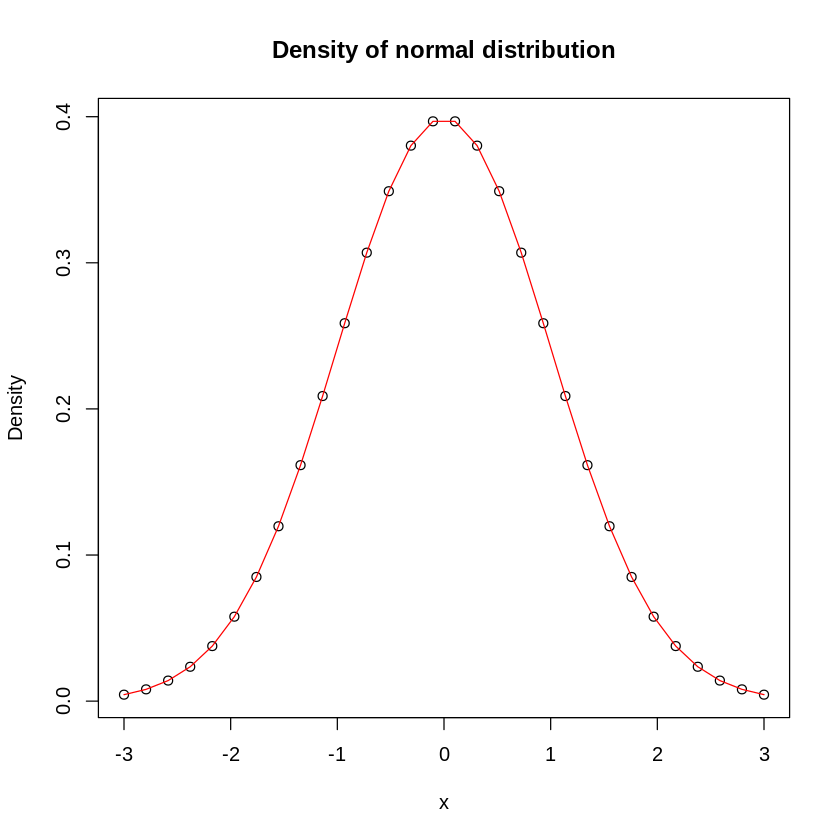

In [19]:
normal_density_function <- function(x, mean, sd){

}
# Generate a grid with 30 points between -3 and 3
x = seq(-3, 3, length=30)
# Compute the corresponding densities
y1 = normal_density_function(x=x, mean=0, sd=1)
# Compute the densities from R internal function dnorm()
y2 = dnorm(x=x, mean=0, sd=1)
# Plot the result of function normal_density_function() with points
plot(x, y1, main='Density of normal distribution', xlab='x', ylab='Density', type='p')
# Plot the result of function normal_density_function() with curve
lines(x, y2, lty=1, col="red")